In [412]:
import pandas as pd
import numpy as np
import ast
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [413]:
movies=pd.read_csv(r"E:\Project2\tmdb_5000_movies.csv")
credits=pd.read_csv(r"E:\Project2\tmdb_5000_credits.csv")

In [414]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [415]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [416]:
movies.shape

(4803, 20)

In [417]:
credits.shape

(4803, 4)

In [418]:
movies1=movies.merge(credits,on='title')

In [419]:
movies1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [420]:
movies1.shape

(4809, 23)

In [421]:
movies1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [422]:
movies1.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [423]:
#vote count

In [424]:
movies1['vote_count'].count()

4809

In [425]:
movies1['vote_count'].sum()

3319805

In [426]:
movies1['vote_count'].max()

13752

In [427]:
movies1['vote_count'].min()

0

In [428]:
movies1['vote_count'].mean()

690.3316697858182

In [429]:
#popularity

In [430]:
movies1['popularity'].mean()

21.49166429424

In [431]:
movies1['popularity'].min()

0.0

In [432]:
movies1['popularity'].max()

875.581305

In [433]:
#runtime

In [434]:
movies1['runtime'].mean()

106.88225504472643

In [435]:
movies1['runtime'].max()

338.0

In [436]:
#vote_average

In [437]:
movies1['vote_average'].mean()

6.092514036182154

In [438]:
movies1['vote_average'].min()

0.0

In [439]:
movies1['vote_average'].max()

10.0

In [440]:
#EDA

In [441]:
movies=movies1[['movie_id','title','overview','genres','keywords','cast','crew','vote_average','vote_count']]

In [442]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,vote_average,vote_count
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2,11800
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9,4500
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3,4466
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6,9106
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1,2124


In [443]:
# type of entries, how many missing values/null fields
movies.info()
print('nMissing values:  ', movies.isnull().sum().values.sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      4809 non-null   int64  
 1   title         4809 non-null   object 
 2   overview      4806 non-null   object 
 3   genres        4809 non-null   object 
 4   keywords      4809 non-null   object 
 5   cast          4809 non-null   object 
 6   crew          4809 non-null   object 
 7   vote_average  4809 non-null   float64
 8   vote_count    4809 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 375.7+ KB
nMissing values:   3


In [444]:
movies.isnull().sum()

movie_id        0
title           0
overview        3
genres          0
keywords        0
cast            0
crew            0
vote_average    0
vote_count      0
dtype: int64

In [445]:
movies.dropna(inplace=True)
movies.isnull().sum()

C:\Users\hp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


movie_id        0
title           0
overview        0
genres          0
keywords        0
cast            0
crew            0
vote_average    0
vote_count      0
dtype: int64

In [446]:
# data overview
print('Rows x Columns : ', movies.shape[0], 'x', movies.shape[1])
print('Features: ', movies.columns.tolist())
print('nUnique values:')
print(movies.nunique())

Rows x Columns :  4806 x 9
Features:  ['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew', 'vote_average', 'vote_count']
nUnique values:
movie_id        4800
title           4797
overview        4800
genres          1175
keywords        4220
cast            4759
crew            4773
vote_average      71
vote_count      1609
dtype: int64


In [447]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4806 entries, 0 to 4808
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      4806 non-null   int64  
 1   title         4806 non-null   object 
 2   overview      4806 non-null   object 
 3   genres        4806 non-null   object 
 4   keywords      4806 non-null   object 
 5   cast          4806 non-null   object 
 6   crew          4806 non-null   object 
 7   vote_average  4806 non-null   float64
 8   vote_count    4806 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 375.5+ KB


In [448]:
movies.duplicated().sum()

0

In [449]:
#meanvote
meanvote=movies['vote_average'].mean()
print(meanvote)

6.093258426966287


In [450]:
movies=movies.copy().loc[movies['vote_count']>=1]
movies.shape

(4745, 9)

In [451]:
#cutoff value
minimumvote=movies['vote_count'].min()
print(minimumvote)

1


In [452]:
#weighted average
def weighted_rating(x,minimumvote=minimumvote,meanvote=meanvote):
    voters=x['vote_count']
    avg_vote=x['vote_average']
    return (voters/(voters+minimumvote)*avg_vote)+(minimumvote/(minimumvote+voters)*meanvote)

In [453]:
movies['score']=movies.apply(weighted_rating,axis=1)

In [454]:
rating=movies[['movie_id','title','score']]

In [455]:
rating

,movie_id,title,score
0,19995,Avatar,7.199906
1,285,Pirates of the Caribbean: At World's End,6.899821
2,206647,Spectre,6.299954
3,49026,The Dark Knight Rises,7.599835
4,49529,John Carter,6.099997
...,...,...,...
4804,9367,El Mariachi,6.597880
4805,72766,Newlyweds,5.932210
4806,231617,"Signed, Sealed, Delivered",6.870465
4807,126186,Shanghai Calling,5.749157


In [456]:
movies=movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [457]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [458]:
#["Action","Adventure","Fantasy","Science Fiction"]


In [459]:
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [460]:
movies['genres']=movies['genres'].apply(convert)

In [461]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [462]:
movies['keywords']=movies['keywords'].apply(convert)

In [463]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [464]:
def convert3(obj):
    L=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter!=3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [465]:
movies['cast']=movies['cast'].apply(convert3)

In [466]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [467]:
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
            break
    return L

In [468]:
movies['crew']=movies['crew'].apply(fetch_director)

In [469]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [518]:
details=movies.copy()
details["runtime"]=movies1["runtime"]
details["release_date"]=movies1["release_date"]
details["popularity"]=movies1["popularity"]
details["vote_average"]=movies1["vote_average"]
details["vote_count"]=movies1["vote_count"]
details["original_language"]=movies1["original_language"]
details["score"]=rating["score"]
details.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags,runtime,release_date,popularity,vote_average,vote_count,original_language,score
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin...",162.0,2009-12-10,150.437577,7.2,11800,en,7.199906
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d...",169.0,2007-05-19,139.082615,6.9,4500,en,6.899821
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send...",148.0,2015-10-26,107.376788,6.3,4466,en,6.299954
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney...",165.0,2012-07-16,112.312950,7.6,9106,en,7.599835
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili...",132.0,2012-03-07,43.926995,6.1,2124,en,6.099997


In [471]:
details.shape

(4745, 14)

In [472]:
details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4745 entries, 0 to 4808
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           4745 non-null   int64  
 1   title              4745 non-null   object 
 2   overview           4745 non-null   object 
 3   genres             4745 non-null   object 
 4   keywords           4745 non-null   object 
 5   cast               4745 non-null   object 
 6   crew               4745 non-null   object 
 7   runtime            4745 non-null   float64
 8   release_date       4745 non-null   object 
 9   popularity         4745 non-null   float64
 10  vote_average       4745 non-null   float64
 11  vote_count         4745 non-null   int64  
 12  score              4745 non-null   float64
 13  original_language  4745 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 556.1+ KB


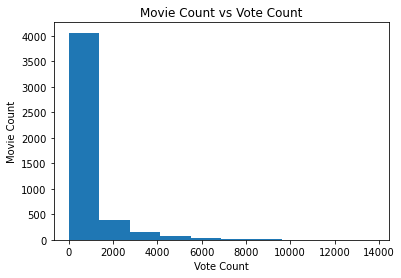

In [473]:
from matplotlib import pyplot as plt
vote_count = details['vote_count']
fig, ax = plt.subplots(1, 1)
ax.hist(vote_count)
ax.set_title("Movie Count vs Vote Count")
ax.set_xlabel('Vote Count')
ax.set_ylabel('Movie Count')
plt.show()

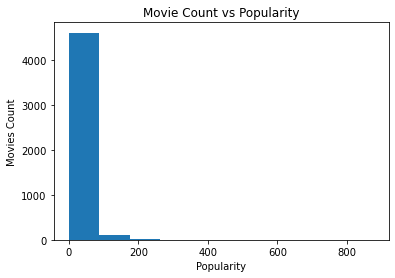

In [474]:
popularity = details['popularity']
fig, ax = plt.subplots(1, 1)
ax.hist(popularity)
ax.set_title("Movie Count vs Popularity")
ax.set_xlabel('Popularity')
ax.set_ylabel('Movies Count')
plt.show()

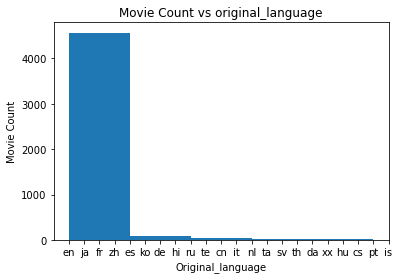

In [475]:
original_language = details['original_language']
fig, ax = plt.subplots(1, 1)
ax.hist(original_language,bins=[0, 4, 8, 12, 16, 20])
ax.set_title("Movie Count vs original_language")
ax.set_xlabel('Original_language')
ax.set_ylabel('Movie Count')
plt.show()


Text(0, 0.5, 'language')

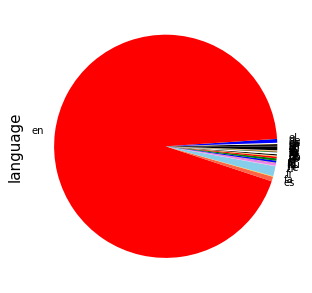

In [476]:
fig, ax = plt.subplots(figsize=(5, 20))
details.groupby('original_language').size().plot(kind='pie', textprops={'fontsize': 10},
                                  colors=['pink','violet','black','orange','white','blue','green','red','tomato', 'gold', 'skyblue'], ax=ax)
ax.set_ylabel('language',size=15)

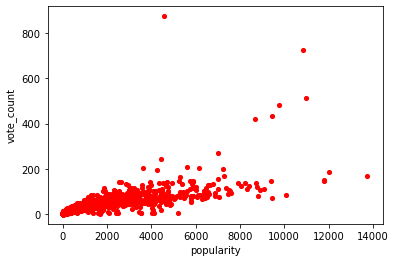

In [477]:
plt.scatter( vote_count,popularity,
            linewidths = 2,
            color ="red",
            s = 10)
 
plt.xlabel("popularity")
plt.ylabel("vote_count")
plt.show()

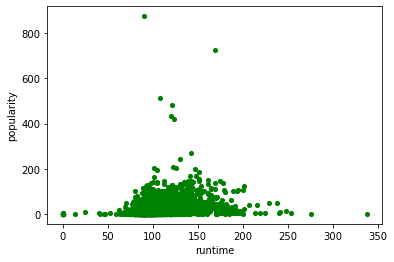

In [524]:
runtime=details['runtime']
plt.scatter( runtime,popularity,
            linewidths = 2,
            color ="green",
            s = 10)
 
plt.xlabel("runtime")
plt.ylabel("popularity")
plt.show()

Text(0, 0.5, 'popular movies')

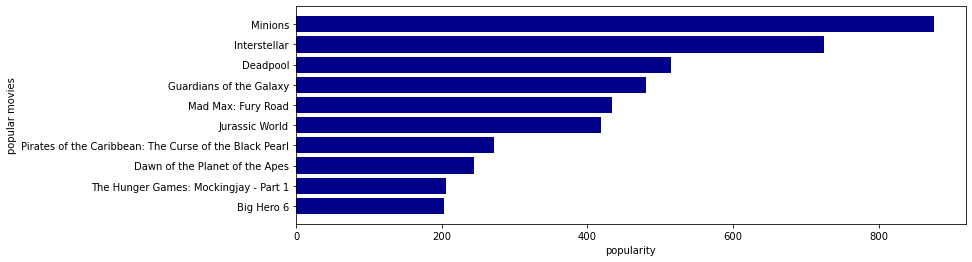

In [532]:
popular=details.sort_values('popularity',ascending=False)
plt.subplots(figsize=(12, 4))
plt.barh(popular['title'].head(10),popular["popularity"].head(10),align='center',color='darkblue')
plt.gca().invert_yaxis()
plt.xlabel('popularity')
plt.ylabel('popular movies')

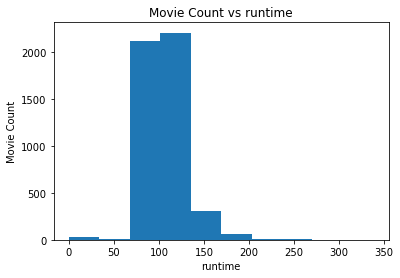

In [526]:
runtime = details['runtime']
fig, ax = plt.subplots(1, 1)
ax.hist(runtime)
ax.set_title("Movie Count vs runtime")
ax.set_xlabel('runtime')
ax.set_ylabel('Movie Count')
plt.show()

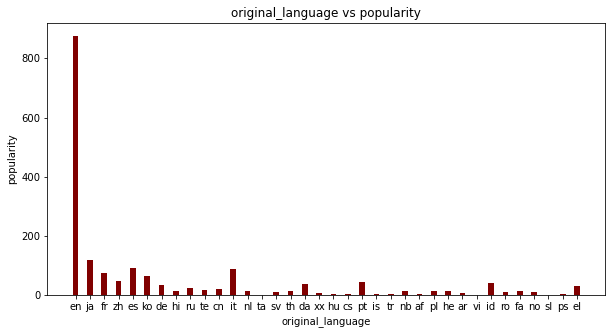

In [478]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(original_language,popularity, color ='maroon',
        width = 0.4)
 
plt.xlabel("original_language")
plt.ylabel("popularity")
plt.title("original_language vs popularity")
plt.show()

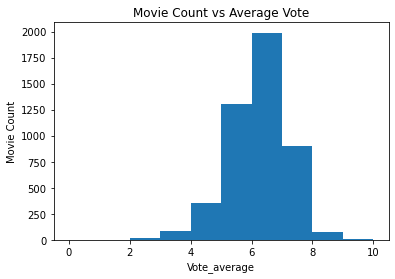

In [479]:
import pandas as pd
from matplotlib import pyplot as plt
vote_average = details['vote_average']
fig, ax = plt.subplots(1, 1)
ax.hist(vote_average)
ax.set_title("Movie Count vs Average Vote")
ax.set_xlabel('Vote_average')
ax.set_ylabel('Movie Count')
plt.show()

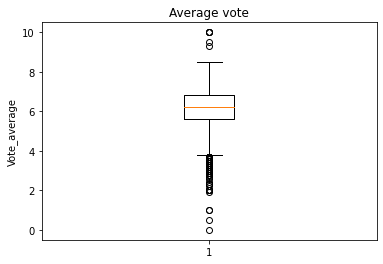

In [480]:
fig, ax = plt.subplots(1, 1)
ax.boxplot(vote_average)
ax.set_title("Average vote")
ax.set_ylabel('Vote_average')
plt.show()

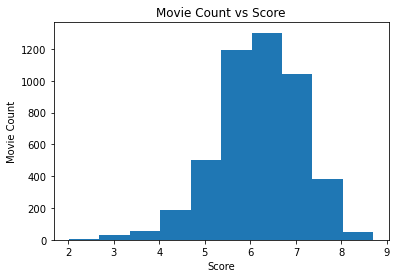

In [481]:
score = details['score']
fig, ax = plt.subplots(1, 1)
ax.hist(score)
ax.set_title("Movie Count vs Score")
ax.set_xlabel('Score')
ax.set_ylabel('Movie Count')
plt.show()

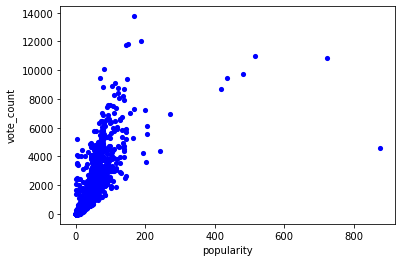

In [482]:
plt.scatter( popularity,vote_count,
            linewidths = 2,
            color ="blue",
            s = 10)
 
plt.xlabel('popularity')
plt.ylabel("vote_count")
plt.show()

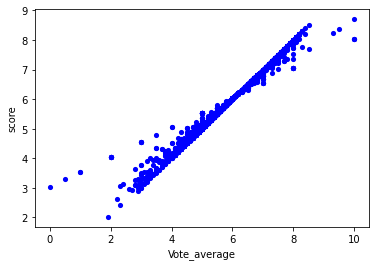

In [483]:
plt.scatter( vote_average,score,
            linewidths = 2,
            color ="blue",
            s = 10)
 
plt.xlabel("Vote_average")
plt.ylabel('score')
plt.show()

In [484]:
movies['overview']=movies['overview'].apply(lambda x:x.split())

In [485]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [486]:
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","")for i in x])
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","")for i in x])
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","")for i in x])
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","")for i in x])

In [487]:
movies.head(8)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]
5,559,Spider-Man 3,"[The, seemingly, invincible, Spider-Man, goes,...","[Fantasy, Action, Adventure]","[dualidentity, amnesia, sandstorm, loveofone's...","[TobeyMaguire, KirstenDunst, JamesFranco]",[SamRaimi]
6,38757,Tangled,"[When, the, kingdom's, most, wanted-and, most,...","[Animation, Family]","[hostage, magic, horse, fairytale, musical, pr...","[ZacharyLevi, MandyMoore, DonnaMurphy]",[ByronHoward]
7,99861,Avengers: Age of Ultron,"[When, Tony, Stark, tries, to, jumpstart, a, d...","[Action, Adventure, ScienceFiction]","[marvelcomic, sequel, superhero, basedoncomicb...","[RobertDowneyJr., ChrisHemsworth, MarkRuffalo]",[JossWhedon]


In [488]:
movies['tags']=movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']

In [489]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [510]:
new_df=movies[['movie_id','title','tags']]

In [511]:
  new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\hp\AppData\Local\Temp/ipykernel_8876/1686540910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))


In [512]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [493]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

<AxesSubplot:>

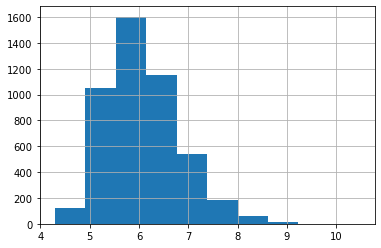

In [494]:
new_df['tags'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [495]:
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())

C:\Users\hp\AppData\Local\Temp/ipykernel_8876/4224080999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:x.lower())


In [496]:
new_df.head(15)

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."
5,559,Spider-Man 3,the seemingly invincible spider-man goes up ag...
6,38757,Tangled,when the kingdom's most wanted-and most charmi...
7,99861,Avengers: Age of Ultron,when tony stark tries to jumpstart a dormant p...
8,767,Harry Potter and the Half-Blood Prince,"as harry begins his sixth year at hogwarts, he..."
9,209112,Batman v Superman: Dawn of Justice,fearing the actions of a god-like super hero l...


In [497]:
#Remove digits and words containing digits
import re
new_df['tags']=new_df['tags'].apply(lambda x: re.sub('\w*\d\w*','', x))
new_df

C:\Users\hp\AppData\Local\Temp/ipykernel_8876/2341536326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x: re.sub('\w*\d\w*','', x))


,movie_id,title,tags
0,19995,Avatar,"in the century, a paraplegic marine is dispat..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."
...,...,...,...
4804,9367,El Mariachi,el mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,a newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,when ambitious new york attorney sam is sent t...


In [498]:
#Remove Punctuations
import string
new_df['tags']=new_df['tags'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
new_df

C:\Users\hp\AppData\Local\Temp/ipykernel_8876/429013583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


,movie_id,title,tags
0,19995,Avatar,in the century a paraplegic marine is dispatc...
1,285,Pirates of the Caribbean: At World's End,captain barbossa long believed to be dead has ...
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,john carter is a warweary former military capt...
...,...,...,...
4804,9367,El Mariachi,el mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,a newlywed couples honeymoon is upended by the...
4806,231617,"Signed, Sealed, Delivered",signed sealed delivered introduces a dedicated...
4807,126186,Shanghai Calling,when ambitious new york attorney sam is sent t...


In [499]:
#stemming

In [500]:
ps=PorterStemmer()

In [501]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [502]:
new_df['tags']=new_df['tags'].apply(stem)

C:\Users\hp\AppData\Local\Temp/ipykernel_8876/3514595201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stem)


In [503]:
new_df['tags'][0]

'in the centuri a parapleg marin is dispatch to the moon pandora on a uniqu mission but becom torn between follow order and protect an alien civil action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul samworthington zoesaldana sigourneyweav jamescameron'

In [504]:
new_df['tags'][1]

'captain barbossa long believ to be dead ha come back to life and is head to the edg of the earth with will turner and elizabeth swann but noth is quit as it seem adventur fantasi action ocean drugabus exoticisland eastindiatradingcompani loveofoneslif traitor shipwreck strongwoman ship allianc calypso afterlif fighter pirat swashbuckl aftercreditssting johnnydepp orlandobloom keiraknightley goreverbinski'

In [505]:
new_df

,movie_id,title,tags
0,19995,Avatar,in the centuri a parapleg marin is dispatch to...
1,285,Pirates of the Caribbean: At World's End,captain barbossa long believ to be dead ha com...
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,john carter is a warweari former militari capt...
...,...,...,...
4804,9367,El Mariachi,el mariachi just want to play hi guitar and ca...
4805,72766,Newlyweds,a newlyw coupl honeymoon is upend by the arriv...
4806,231617,"Signed, Sealed, Delivered",sign seal deliv introduc a dedic quartet of ci...
4807,126186,Shanghai Calling,when ambiti new york attorney sam is sent to s...


In [506]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
new_df['tags']=new_df['tags'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

KeyboardInterrupt: 

In [ ]:
df_grouped=new_df[['title','tags']].groupby(by='title').agg(lambda x:' '.join(x))
df_grouped.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['tags'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

In [ ]:
# Creating Document Term Matrix

from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=90,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(8,6))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
    
df_dtm=df_dtm.transpose()
# Plotting word cloud for each product
for index,words in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[words].sort_values(ascending=False),words)

In [513]:
import nltk
from nltk.corpus import stopwords
import collections
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<AxesSubplot:>

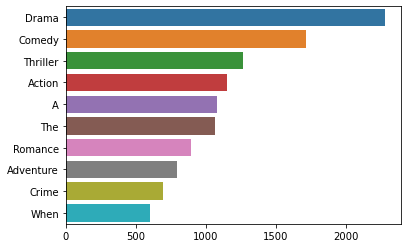

In [514]:
import seaborn as sns
corpus=[]
new= new_df['tags'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

counter=collections.Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)


<AxesSubplot:>

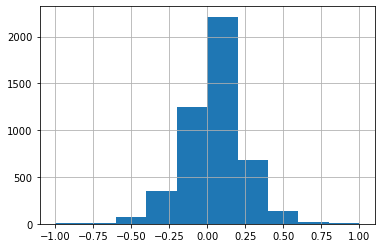

In [517]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity
new1=new_df.copy()
new1['polarity_score']=new_df['tags'].\
   apply(lambda x : polarity(x))
new1['polarity_score'].hist()

In [ ]:
#vectorize

In [ ]:
cv=CountVectorizer(max_features=5000,stop_words='english')

In [ ]:
vectors=cv.fit_transform(new_df['tags']).toarray()

In [ ]:
 vectors

In [ ]:
vectors[0]

In [ ]:
cv.get_feature_names()

In [ ]:
ps.stem('love')

In [ ]:
#cosine similarity

In [ ]:
similarity=cosine_similarity(vectors)

In [ ]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

In [ ]:
def recommend(movie):
    movie_index=new_df[new_df['title']==movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in movies_list:
        print(new_df.iloc[i[0]].title)
    


In [ ]:
recommend('Avatar')

In [ ]:
#pickle.dump(new_df.to_dict(),open('movies_dict.pkl','wb'))

In [ ]:
#pickle.dump(similarity,open('similarity.pkl','wb'))

In [ ]:
#pickle.dump(rating.to_dict(),open('rating.pkl','wb'))

In [ ]:
#pickle.dump(details.to_dict(),open('details.pkl','wb'))